In [1]:
import pandas as pd
import numpy as np

In [2]:
data = "CA_measurement.xlsx" ## this is raw data from Greg
dry_weight = "dry_weight_copy.xlsx" ## this is dry weight data from Karthika

In [3]:
df_acid = pd.read_excel(data)
df_weight = pd.read_excel(dry_weight,sheet_name="cleaned")

In [4]:
df_acid.head() ## view the first 5 row of acid data

,SampleName,Vial,ID,[µM],Unnamed: 4,Unnamed: 5
0,Yong 1-1,5,malic,3.1226,NaN,NaN
1,Yong 1-1,5,malonic,88.7224,NaN,Concentration reported in column 'D' is units ...
2,Yong 1-1,5,iso-citric,ND,NaN,Value highlighted in yellow for concentration ...
3,Yong 1-1,5,shikimic,ND,NaN,NaN
4,Yong 1-1,5,lactic,13.8709,NaN,NaN


In [5]:
df_weight.head() ## view the first 5 row of dry weight data

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173,118.0
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133,115.0
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128,110.0
3,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128,168.0
4,14,1,14,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183,193.0


## cleaning data

In [6]:
df_acid = df_acid[df_acid.columns.to_list()[:-2]] ## drop last two columns

In [7]:
df_acid.head() ## view again after dropping the last two columns

,SampleName,Vial,ID,[µM]
0,Yong 1-1,5,malic,3.1226
1,Yong 1-1,5,malonic,88.7224
2,Yong 1-1,5,iso-citric,ND
3,Yong 1-1,5,shikimic,ND
4,Yong 1-1,5,lactic,13.8709


In [9]:
df_acid.to_csv("CA_plotting.csv",index=None,sep="\t") ## save a copy

In [10]:
df_acid.columns = ["SampleName","Vial","Acid","Concentration"] ## change column names

## replace "ND " with np.NaN

In [13]:
df_acid["Concentration"] = df_acid["Concentration"].astype("str").replace("ND ",np.NaN) ## replace "ND"

In [14]:
df_acid["Concentration"].str.count("ND").sum() ## checking no "ND"  in sheet

0.0

In [15]:
df_acid.head(10) ## view the file again

,SampleName,Vial,Acid,Concentration
0,Yong 1-1,5,malic,3.1226
1,Yong 1-1,5,malonic,88.72245
2,Yong 1-1,5,iso-citric,NaN
3,Yong 1-1,5,shikimic,NaN
4,Yong 1-1,5,lactic,13.87087
5,Yong 1-1,5,acetic,164.2043
6,Yong 1-1,5,maleic,0.13918
7,Yong 1-1,5,citric,NaN
8,Yong 1-1,5,succinic,NaN
9,Yong 1-1,5,citramalic,NaN


## change dtype

In [16]:
df_acid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
SampleName       767 non-null object
Vial             767 non-null int64
Acid             767 non-null object
Concentration    250 non-null object
dtypes: int64(1), object(3)
memory usage: 24.1+ KB


In [17]:
df_acid["Concentration"] = pd.to_numeric(df_acid["Concentration"],errors='coerce') ## change object to float

In [18]:
df_acid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
SampleName       767 non-null object
Vial             767 non-null int64
Acid             767 non-null object
Concentration    250 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB


## Matching acid sample name with variety name

In [19]:
df_weight.head()

,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.140,0.082,173,118.0
1,2,1,2,R1,0 Al,4,49969,Kayat_064,0.165,0.085,133,115.0
2,3,1,3,R1,0 Al,6,50033,Sarik_067,0.088,0.080,128,110.0
3,5,1,5,R1,0 Al,10,50111,Deste_064,0.056,0.049,128,168.0
4,14,1,14,R1,0 Al,28,PBA Pistol,PBA Pistol,0.319,0.132,183,193.0


In [20]:
df_acid.head()

,SampleName,Vial,Acid,Concentration
0,Yong 1-1,5,malic,3.12260
1,Yong 1-1,5,malonic,88.72245
2,Yong 1-1,5,iso-citric,NaN
3,Yong 1-1,5,shikimic,NaN
4,Yong 1-1,5,lactic,13.87087


In [22]:
df_weight["SampleName"] = df_weight["Container"].astype(str) + "-" + df_weight["Order"].astype(str) ## add samplename column

In [23]:
df_acid["SampleName"] = df_acid["SampleName"].str.split(expand=True)[1] ## split and asign new column

In [24]:
df_merged = df_acid.merge(df_weight,on="SampleName",how="left")

In [25]:
df_merged.head() ## View the merged data file

,SampleName,Vial,Acid,Concentration,No,Container,Order,Replicate,Treatment,Exp 18 ID,AGG Accession,Name,st dry wt,rt dry wt,LLR 1,LLR 2
0,1-1,5,malic,3.12260,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
1,1-1,5,malonic,88.72245,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
2,1-1,5,iso-citric,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
3,1-1,5,shikimic,NaN,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0
4,1-1,5,lactic,13.87087,1,1,1,R1,0 Al,2,49871,CudiB_008B,0.14,0.082,173,118.0


## grouped barplots seaborn

In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [28]:
## Filter data columns
cols=["SampleName","Name","AGG Accession","Treatment","Replicate","Acid","Concentration",'st dry wt', 'rt dry wt', 'LLR 1', 'LLR 2']
df_short = df_merged[cols]
df_short.head()

,SampleName,Name,AGG Accession,Treatment,Replicate,Acid,Concentration,st dry wt,rt dry wt,LLR 1,LLR 2
0,1-1,CudiB_008B,49871,0 Al,R1,malic,3.12260,0.14,0.082,173,118.0
1,1-1,CudiB_008B,49871,0 Al,R1,malonic,88.72245,0.14,0.082,173,118.0
2,1-1,CudiB_008B,49871,0 Al,R1,iso-citric,NaN,0.14,0.082,173,118.0
3,1-1,CudiB_008B,49871,0 Al,R1,shikimic,NaN,0.14,0.082,173,118.0
4,1-1,CudiB_008B,49871,0 Al,R1,lactic,13.87087,0.14,0.082,173,118.0


In [29]:
# group by Name,Treatment,Acid
df_short.groupby(["Name","Treatment","Acid"]).mean().head(15)

Concentration  st dry wt  rt dry wt  \
Name      Treatment Acid                                                  
Bari2_074 0 Al      acetic             111.498140   0.131667   0.068667   
                    cis-aconitic              NaN   0.131667   0.068667   
                    citramalic                NaN   0.131667   0.068667   
                    citric                    NaN   0.131667   0.068667   
                    fumaric              0.108720   0.131667   0.068667   
                    iso-citric                NaN   0.131667   0.068667   
                    lactic                    NaN   0.131667   0.068667   
                    maleic               0.128277   0.131667   0.068667   
                    malic                     NaN   0.131667   0.068667   
                    malonic            139.593853   0.131667   0.068667   
                    shikimic                  NaN   0.131667   0.068667   
                    succinic                  NaN   0.131667   0.068667   
                    trans-aconitic            NaN   0.131667   0.068667   
          15 Al     acetic             139.092563   0.113333   0.070000   
                    cis-aconitic              NaN   0.113333   0.070000   

                                        LLR 1      LLR 2  
Name      Treatment Acid                                  
Bari2_074 0 Al      acetic          64.333333  75.666667  
                    cis-aconitic    64.333333  75.666667  
                    citramalic      64.333333  75.666667  
                    citric          64.333333  75.666667  
                    fumaric         64.333333  75.666667  
                    iso-citric      64.333333  75.666667  
                    lactic          64.333333  75.666667  
                    maleic          64.333333  75.666667  
                    malic           64.333333  75.666667  
                    malonic         64.333333  75.666667  
                    shikimic        64.333333  75.666667  
                    succinic        64.333333  75.666667  
                    trans-aconitic  64.333333  75.666667  
          15 Al     acetic          65.333333  69.000000  
                    cis-aconitic    65.333333  69.000000

In [30]:
## separate control and treatment into two dataframes
df_control = df_short[df_short["Treatment"]=="0 Al"]
df_treatment = df_short[df_short["Treatment"]=="15 Al"]

In [31]:
## calculate normalized acid concentration by root dry wt
df_control["Concentration_wt"] = df_control["Concentration"]/df_control["rt dry wt"]
df_treatment["Concentration_wt"] = df_treatment["Concentration"]/df_treatment["rt dry wt"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df_control.head()

,SampleName,Name,AGG Accession,Treatment,Replicate,Acid,Concentration,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1-1,CudiB_008B,49871,0 Al,R1,malic,3.12260,0.14,0.082,173,118.0,38.080488
1,1-1,CudiB_008B,49871,0 Al,R1,malonic,88.72245,0.14,0.082,173,118.0,1081.981098
2,1-1,CudiB_008B,49871,0 Al,R1,iso-citric,NaN,0.14,0.082,173,118.0,NaN
3,1-1,CudiB_008B,49871,0 Al,R1,shikimic,NaN,0.14,0.082,173,118.0,NaN
4,1-1,CudiB_008B,49871,0 Al,R1,lactic,13.87087,0.14,0.082,173,118.0,169.156951


### 1. Raw data concentration plotting

In [38]:
## calculating mean and standard error
df_con0 = df_control.groupby(["Name","Acid"])["Concentration"].describe()
df_con15 = df_treatment.groupby(["Name","Acid"])["Concentration"].describe()

In [39]:
df_con0.head() ## View the mean and standard errors

count       mean       std        min         25%  \
Name      Acid                                                              
Bari2_074 acetic          3.0  111.49814  3.527681  108.92778  109.487205   
          cis-aconitic    0.0        NaN       NaN        NaN         NaN   
          citramalic      0.0        NaN       NaN        NaN         NaN   
          citric          0.0        NaN       NaN        NaN         NaN   
          fumaric         2.0    0.10872  0.005784    0.10463    0.106675   

                              50%         75%        max  
Name      Acid                                            
Bari2_074 acetic        110.04663  112.783320  115.52001  
          cis-aconitic        NaN         NaN        NaN  
          citramalic          NaN         NaN        NaN  
          citric              NaN         NaN        NaN  
          fumaric         0.10872    0.110765    0.11281

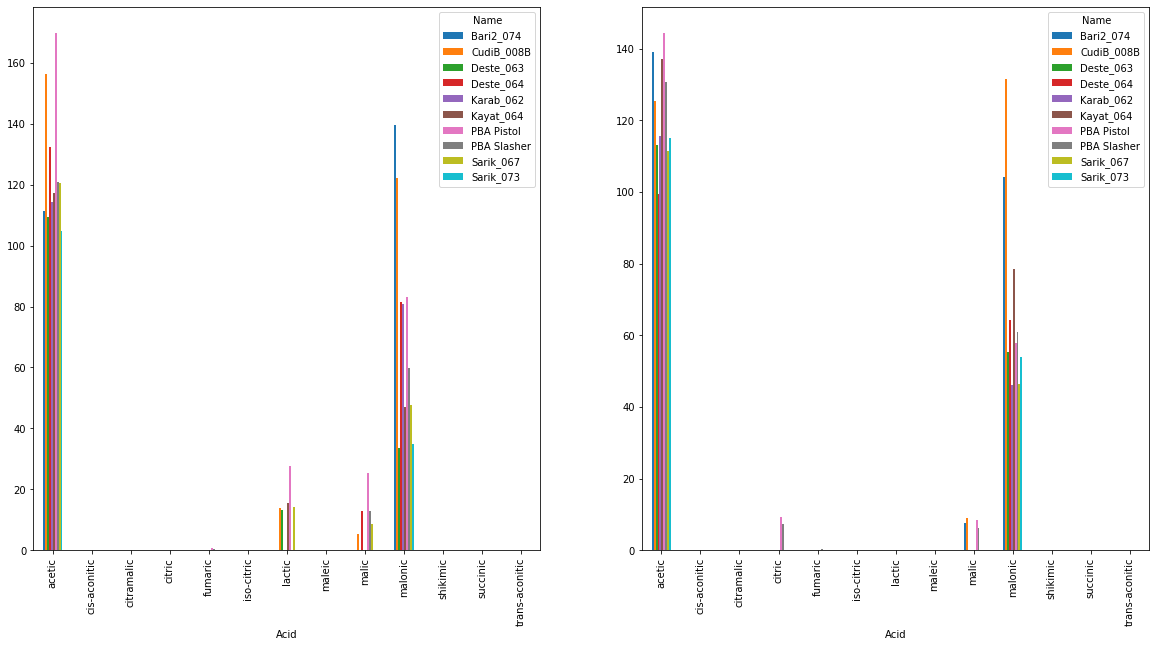

In [41]:
## Plotting as bar chart
fig, ax = plt.subplots(1,2,figsize=(20, 10))
df_con0["mean"].unstack(0).plot.bar(ax=ax[0])
df_con15["mean"].unstack(0).plot.bar(ax=ax[1])
plt.show()

### 3. Plotting normalized concentration

In [42]:
## groupby to get mean and std
df_con0_nom = df_control.groupby(["Name","Acid"])["Concentration_wt"].describe()
df_con15_nom = df_treatment.groupby(["Name","Acid"])["Concentration_wt"].describe()

In [43]:
df_con0_nom.head()

count         mean         std          min  \
Name      Acid                                                        
Bari2_074 acetic          3.0  1646.132369  230.928168  1487.116622   
          cis-aconitic    0.0          NaN         NaN          NaN   
          citramalic      0.0          NaN         NaN          NaN   
          citric          0.0          NaN         NaN          NaN   
          fumaric         2.0     1.687095    0.412990     1.395067   

                                25%          50%          75%          max  
Name      Acid                                                              
Bari2_074 acetic        1513.691711  1540.266800  1725.640242  1911.013684  
          cis-aconitic          NaN          NaN          NaN          NaN  
          citramalic            NaN          NaN          NaN          NaN  
          citric                NaN          NaN          NaN          NaN  
          fumaric          1.541081     1.687095     1.833109     1.979123

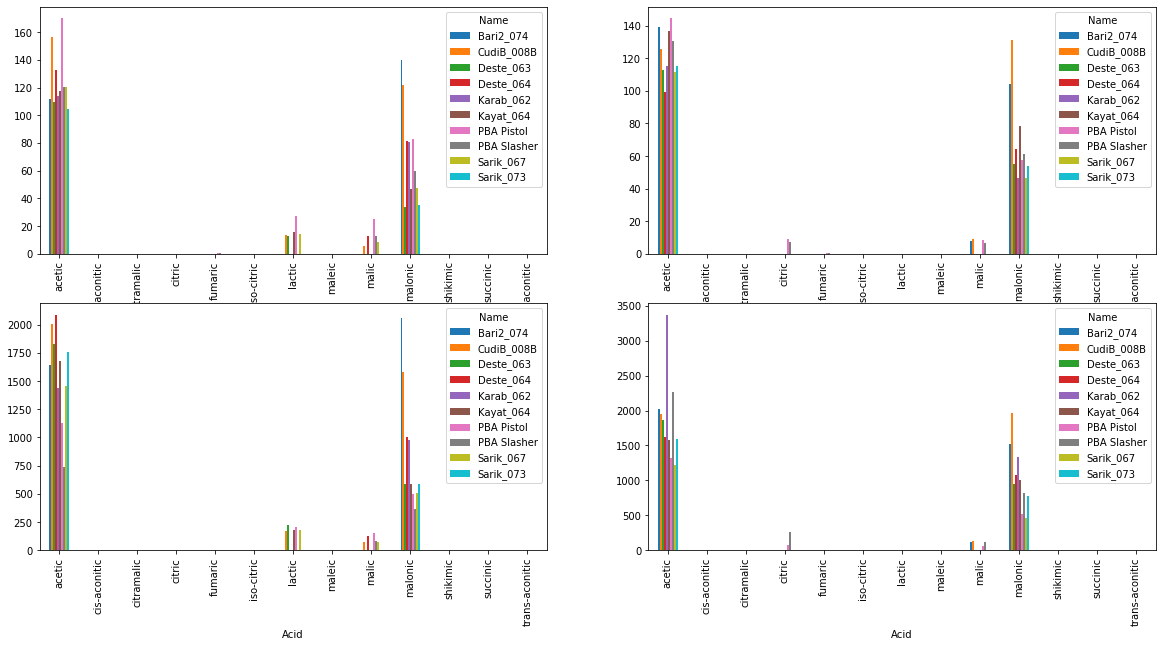

In [44]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))

df_con0["mean"].unstack(0).plot.bar(ax=ax[0,0])
df_con15["mean"].unstack(0).plot.bar(ax=ax[0,1])

df_con0_nom["mean"].unstack(0).plot.bar(ax=ax[1,0])
df_con15_nom["mean"].unstack(0).plot.bar(ax=ax[1,1])
plt.show()

In [45]:
df_con0["mean"].unstack(0)

Name,Bari2_074,CudiB_008B,Deste_063,Deste_064,Karab_062,Kayat_064,PBA Pistol,PBA Slasher,Sarik_067,Sarik_073
Acid,,,,,,,,,,
acetic,111.498140,156.351560,109.335210,132.432860,114.242040,117.355527,169.892487,120.734103,120.675300,104.838550
cis-aconitic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citramalic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fumaric,0.108720,0.169463,0.115260,0.173757,0.125597,0.108230,0.677450,0.451170,0.151553,0.092835
iso-citric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lactic,NaN,13.870870,13.176060,NaN,NaN,15.582960,27.587790,NaN,14.059840,NaN
maleic,0.128277,0.135680,0.141400,0.131105,0.120945,0.123047,0.144160,0.144993,0.121630,0.128953
malic,NaN,5.448445,NaN,12.951830,NaN,NaN,25.422990,13.039833,8.530190,NaN


## Plotting as scatter plot

In [46]:
df_con0["mean"].max()

169.89248666666666

In [47]:
df_con15["mean"].max()

144.45466333333331

In [176]:
144.45/169.89*240

204.06145152745893

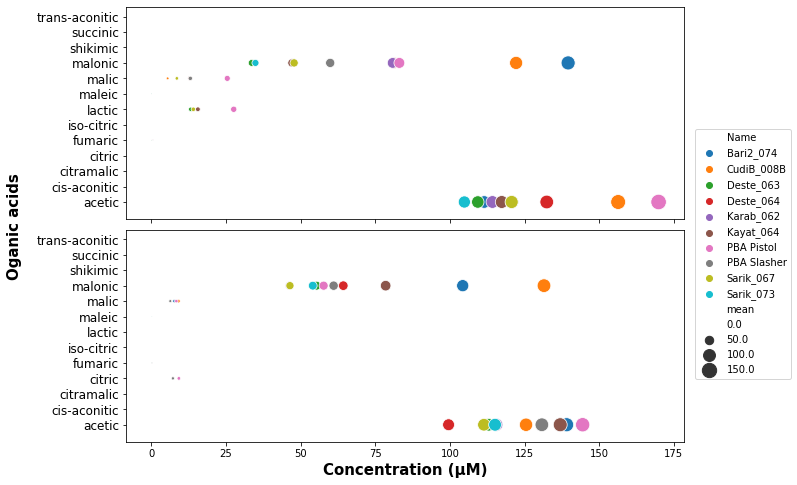

In [48]:
## reset_index to convert index back to columns

## fillna(0) to show all acids, default removing Nan lines

##swap x,y to change orientation

fig,ax=plt.subplots(2,1,figsize=(10,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,240),\
               legend=False)

sns.scatterplot(ax=ax[1], data=df_con15.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,205))
## sizes adjusted based max value in two dataset

ax[1].legend(bbox_to_anchor= (1.2, 1.5) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()


In [178]:
fig.savefig("CA_raw.png",dpi=600,bbox_inches = 'tight') ## Save figure

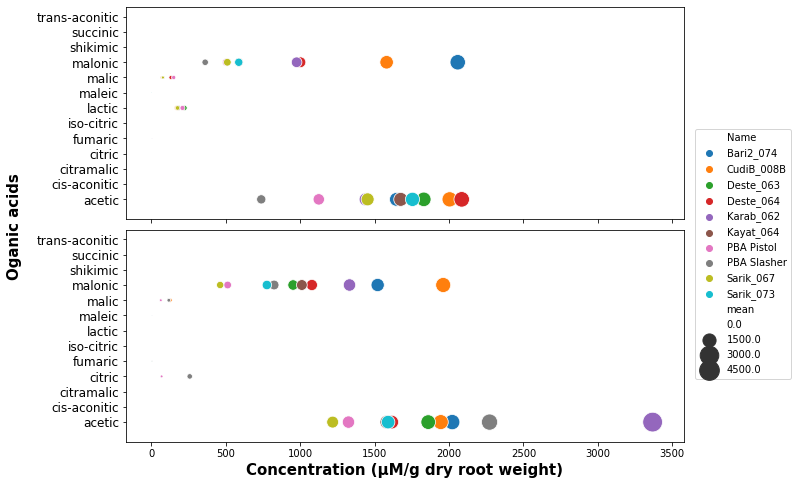

In [49]:
#Plotting the normalized acid data

fig,ax=plt.subplots(2,1,figsize=(10,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0_nom.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,240),\
               legend=False) 

sns.scatterplot(ax=ax[1], data=df_con15_nom.reset_index().fillna(0),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,388))
## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 1.5) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

In [173]:
fig.savefig("CA_normalized.png",dpi=600,bbox_inches = 'tight') ## Save file

In [53]:
### save processed mean data
df_con0_nom.reset_index().to_csv("Control_concentration_mean.csv")
df_con15_nom.reset_index().to_csv("Al_concentration_mean.csv")

In [54]:
### merged and compare control and treatment
df_con0_con15 = df_con0_nom.reset_index().merge(df_con15_nom.reset_index(),on=["Name","Acid"],how="outer")

In [55]:
df_con0_con15.to_csv("Control_Al_concentration_mean.csv")

### plotting acids with data only
### remove fillna(0)

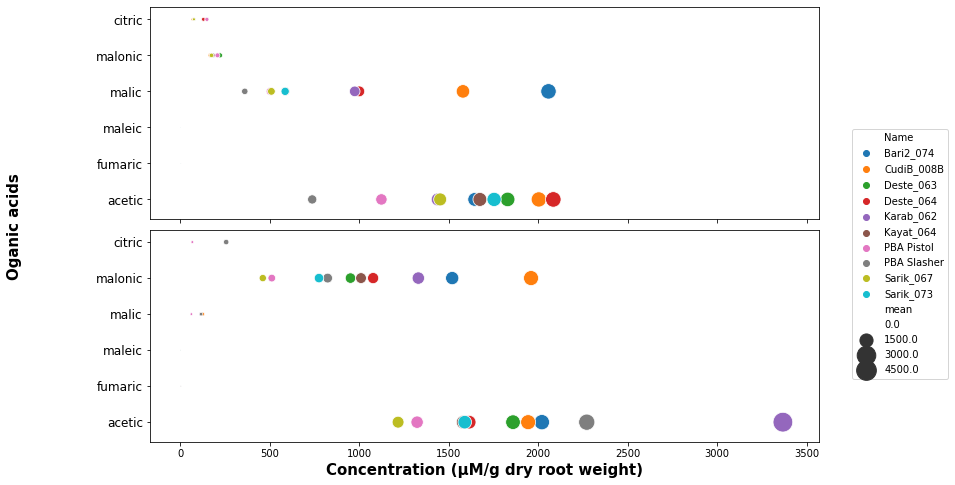

In [52]:
## reset_index to convert index back to columns

## fillna(0) to show all acids, default removing Nan lines

##swap x,y to change orientation

## testing scatterplot and swarmplot (not supporting sizes)

fig,ax=plt.subplots(2,1,figsize=(12,8),sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=df_con0_nom.reset_index(),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,240),\
               legend=False) 

sns.scatterplot(ax=ax[1], data=df_con15_nom.reset_index(),y="Acid", x="mean", hue="Name", size="mean",sizes=(0,388))
## sizes adjusted based max value in two dataset


ax[1].legend(bbox_to_anchor= (1.2, 1.5) ) ## move legend position

##hide x y labels
ax[0].set_ylabel('', fontsize=15)
ax[1].set_ylabel('', fontsize=15)
plt.xlabel('Concentration (μM/g dry root weight)', fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

plt.setp(ax[0].get_yticklabels(), fontsize=12)
plt.setp(ax[1].get_yticklabels(), fontsize=12)

#plt.grid(True)
#plt.tight_layout() ## prevent label cutoff
plt.subplots_adjust(wspace=0, hspace=0.05) ## tight space between subplots

plt.show()

## check any correlation between LLR, stem weight, root weight, and CA

In [179]:
df_control.head()

,SampleName,Name,AGG Accession,Treatment,Replicate,Acid,Concentration,st dry wt,rt dry wt,LLR 1,LLR 2,Concentration_wt
0,1-1,CudiB_008B,49871,0 Al,R1,malic,3.12260,0.14,0.082,173,118.0,38.080488
1,1-1,CudiB_008B,49871,0 Al,R1,malonic,88.72245,0.14,0.082,173,118.0,1081.981098
2,1-1,CudiB_008B,49871,0 Al,R1,iso-citric,NaN,0.14,0.082,173,118.0,NaN
3,1-1,CudiB_008B,49871,0 Al,R1,shikimic,NaN,0.14,0.082,173,118.0,NaN
4,1-1,CudiB_008B,49871,0 Al,R1,lactic,13.87087,0.14,0.082,173,118.0,169.156951


In [180]:
## groupby to get mean
df_mean0 = df_control.groupby(["Name","Acid"]).mean()
df_mean15 = df_treatment.groupby(["Name","Acid"]).mean()

In [182]:
## change column names
col_names = ["Concentration_raw","Stem_dry","Root_dry","LLR1","LLR2","Concentration_wt"]
df_mean0.columns = col_names
df_mean15.columns = col_names

In [190]:
## reset index to filter single acid for pairplot
df_mean0.reset_index(inplace=True)
df_mean15.reset_index(inplace=True)

In [203]:
df_mean15.head()

,Name,Acid,Concentration_raw,Stem_dry,Root_dry,LLR1,LLR2,Concentration_wt,LLR
0,Bari2_074,acetic,139.092563,0.113333,0.07,65.333333,69.0,2021.445696,67.166667
1,Bari2_074,cis-aconitic,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
2,Bari2_074,citramalic,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
3,Bari2_074,citric,NaN,0.113333,0.07,65.333333,69.0,NaN,67.166667
4,Bari2_074,fumaric,0.156747,0.113333,0.07,65.333333,69.0,2.289456,67.166667


In [202]:
## Calculated mean LLR
df_mean0["LLR"] = (df_mean0["LLR1"] + df_mean0["LLR2"])/2
df_mean15["LLR"] = (df_mean15["LLR1"] + df_mean15["LLR2"])/2

In [208]:
target_cols=["Concentration_raw","Stem_dry","Root_dry","LLR","Concentration_wt"]

In [237]:
df_mean0_malonic = df_mean0[df_mean0["Acid"]=="malonic"][target_cols]
df_mean15_malonic = df_mean15[df_mean15["Acid"]=="malonic"][target_cols]

df_mean0_acetic = df_mean0[df_mean0["Acid"]=="acetic"][target_cols]
df_mean15_acetic = df_mean15[df_mean15["Acid"]=="acetic"][target_cols]

In [210]:
df_mean0_malonic.shape

(10, 5)

In [222]:
## annotate linear regression info to graph
from scipy.stats import pearsonr
def corrfunc2(x, y, **kws):
    nas = np.logical_or(x.isna(), y.isna())
    (r, p) = pearsonr(x[~nas], y[~nas])
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(",  p = {:.2f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

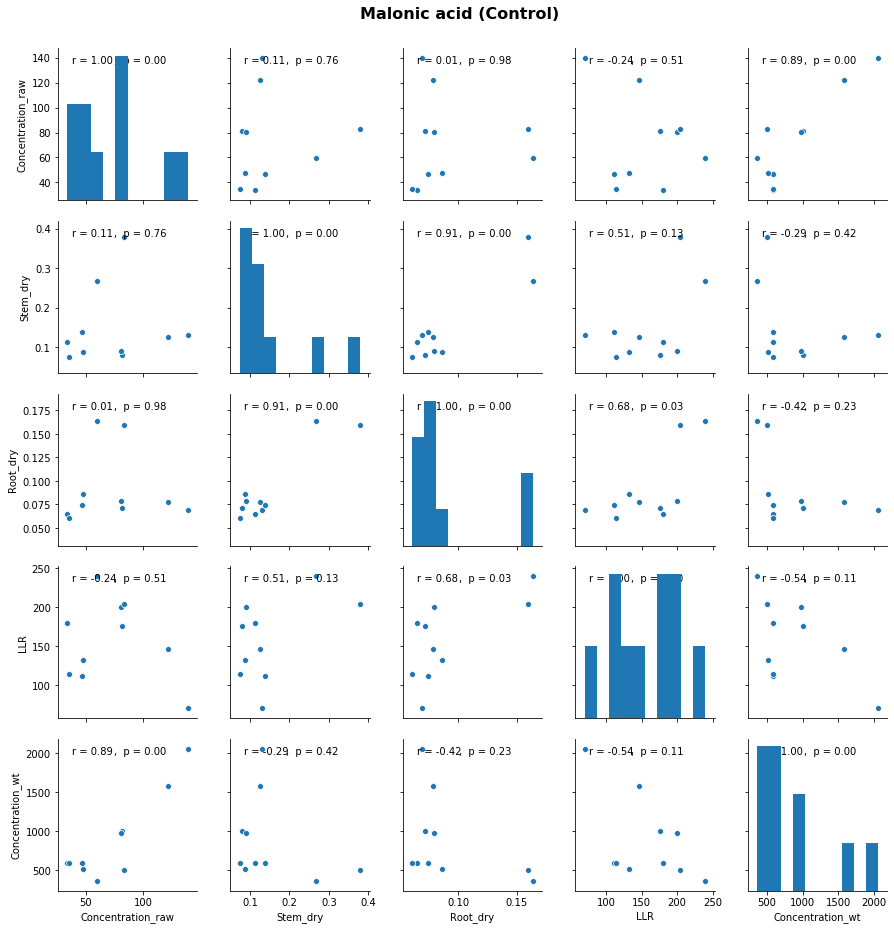

In [234]:
graph1 = sns.pairplot(df_mean0_malonic)
graph1.map(corrfunc2)
graph1.fig.suptitle("Malonic acid (Control)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

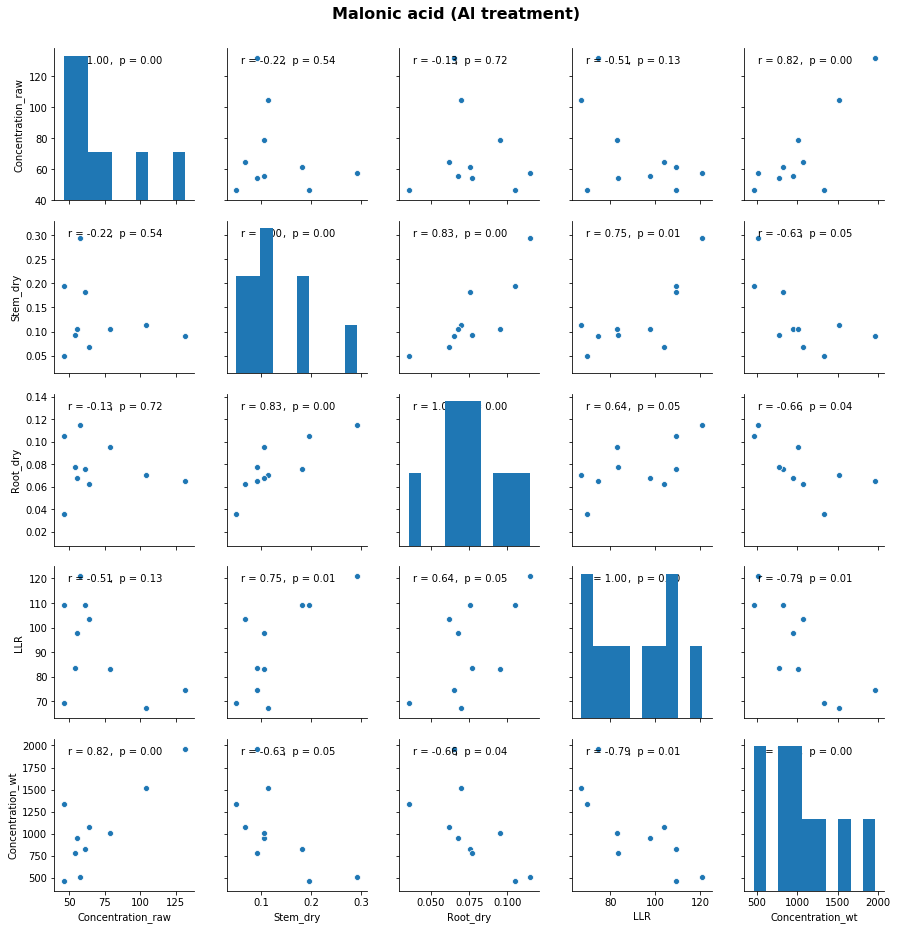

In [235]:
graph2 = sns.pairplot(df_mean15_malonic)
graph2.map(corrfunc2)
graph2.fig.suptitle("Malonic acid (Al treatment)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

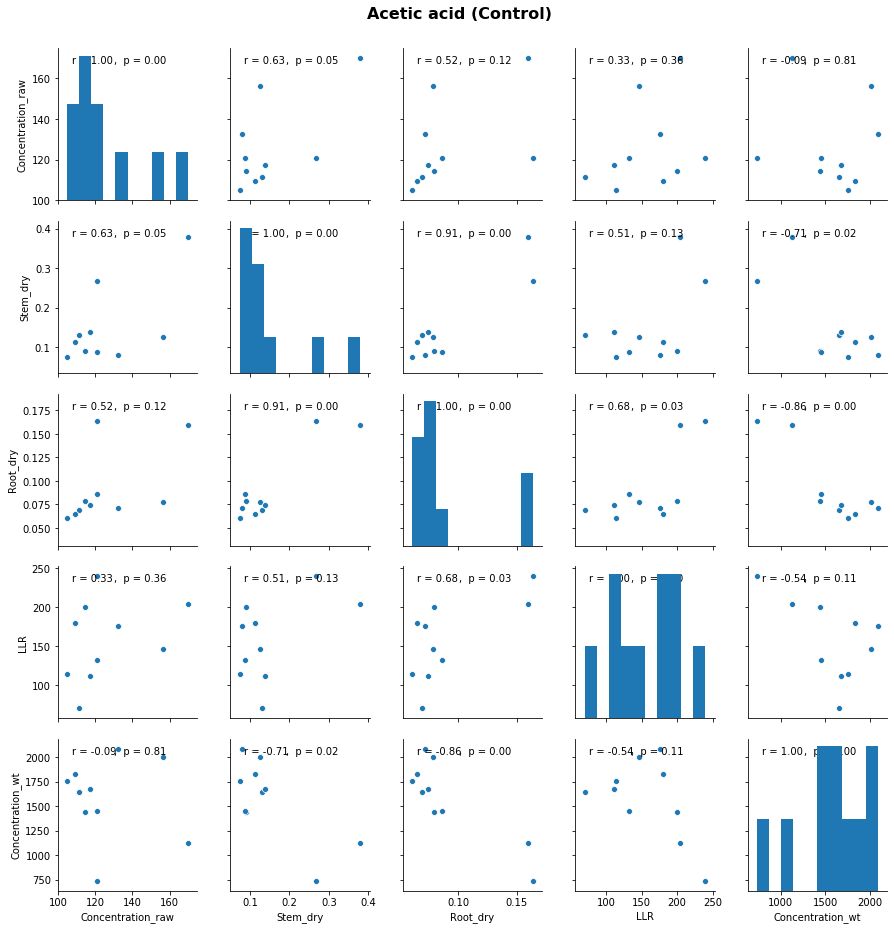

In [238]:
graph3 = sns.pairplot(df_mean0_acetic)
graph3.map(corrfunc2)
graph3.fig.suptitle("Acetic acid (Control)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

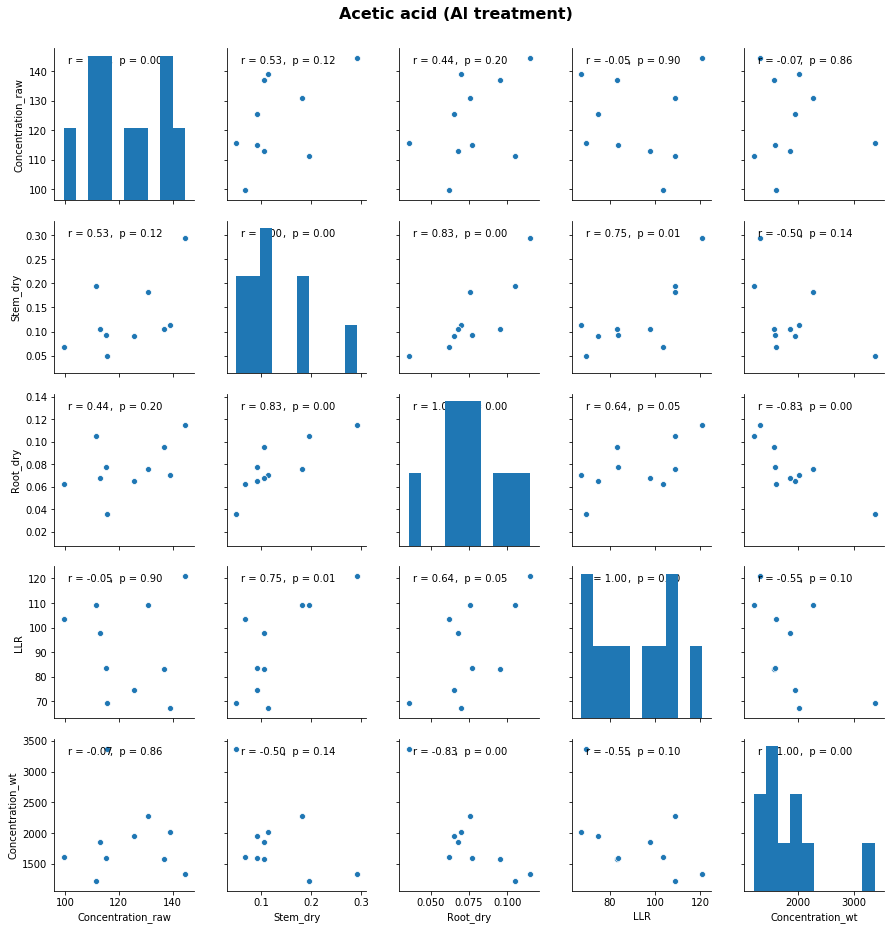

In [239]:
graph4 = sns.pairplot(df_mean15_acetic)
graph4.map(corrfunc2)
graph4.fig.suptitle("Acetic acid (Al treatment)", y=1.03,fontsize=16,fontweight="bold")
plt.show()

In [233]:
graph.savefig("Malonic_pairplot_15Al.png",dpi=300)

In [73]:
df_short[["Container","Sample_order"]] = df_short["SampleName"].str.split("-",expand=True)

In [75]:
df_short["Container"] = df_short["Container"].str.replace("Yong ","")

In [ ]:
controls = []
df_control = df_short[df_short["Container"].isin()]

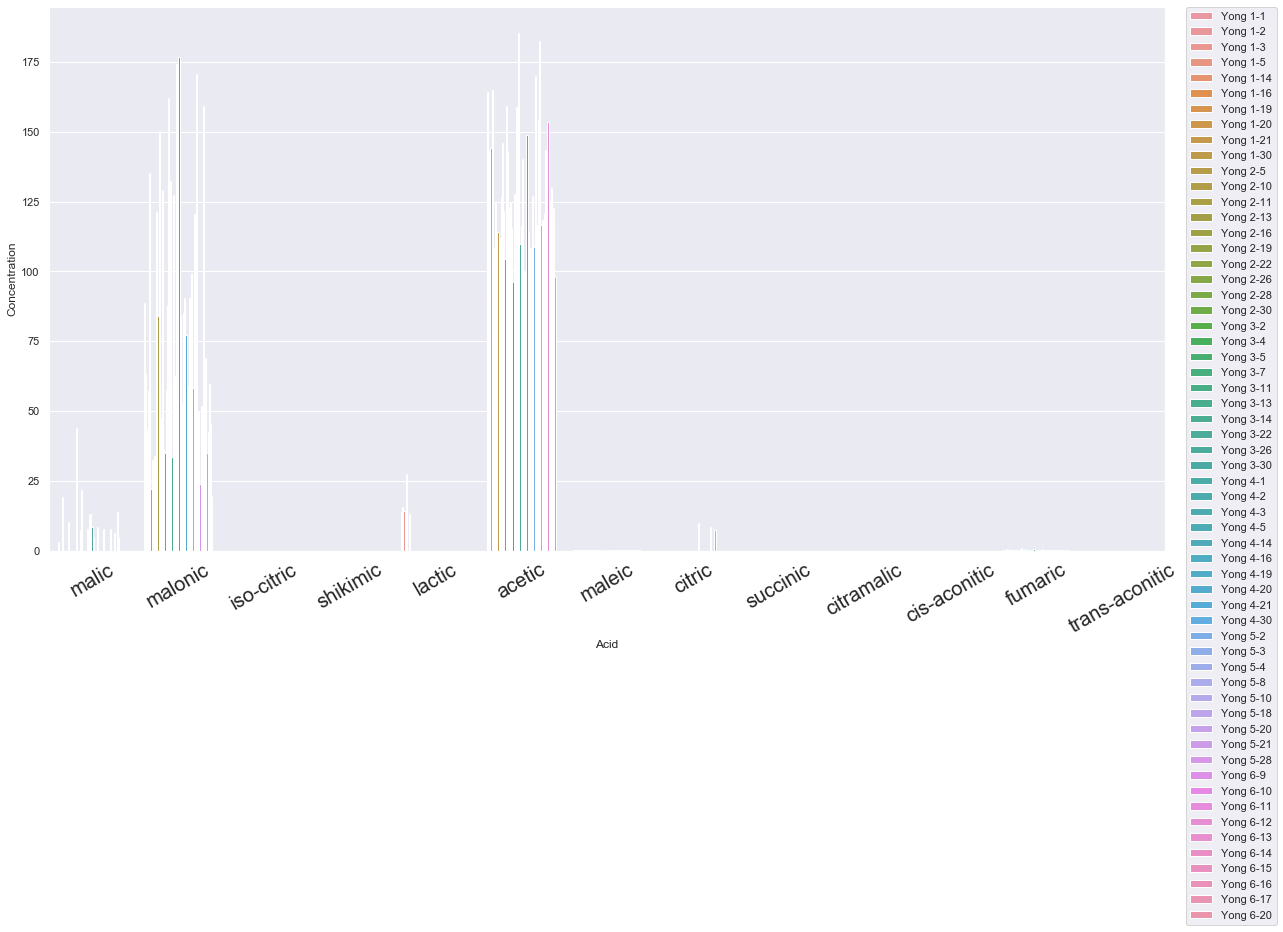

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Acid", y="Concentration", hue="SampleName",data=df_short, ci=None)
plt.legend(bbox_to_anchor=(1.1, 1),
           borderaxespad=0) ## move legend outside figure
ax.tick_params(axis='x', rotation=30,labelsize=20)

## grouped barplot in pyplot, example

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


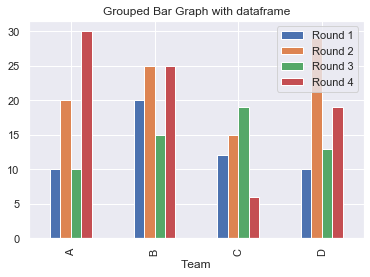

In [62]:
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [63]:
df.head()

,Team,Round 1,Round 2,Round 3,Round 4
0,A,10,20,10,30
1,B,20,25,15,25
2,C,12,15,19,6
3,D,10,29,13,19


## import line information

In [77]:
data2 = "dry_weight_copy.xlsx"

In [78]:
df_info = pd.read_excel(data2,sheet_name="randomisation")

In [79]:
df_info.head()

,No,Container,Replicate,Treatment,Exp 18 ID,Accession,st dry wt,rt dry wt,LLR 1,LLR 2
0,1,1,R1,0 Al,2,49871,0.140,0.082,173.0,118.0
1,2,1,R1,0 Al,4,49969,0.165,0.085,133.0,115.0
2,3,1,R1,0 Al,6,50033,0.088,0.080,128.0,110.0
3,4,1,R1,0 Al,8,50043,0.045,0.047,111.0,109.0
4,5,1,R1,0 Al,10,50111,0.056,0.049,128.0,168.0


In [80]:
df_info2 = pd.read_excel(data2,sheet_name="accession_info")

In [81]:
df_info2.head()

,Exp-18 ID,AGG number,Name,Classification/tolerance,Type,Species,Classification based on*,Included in Exp-16
0,1,49809,Bari2_074,T,wild,C.retic,Exp-5,Y
1,2,49871,CudiB_008B,mod S in Exp-5/mod T in Exp-8,wild,C.retic,Exp-5 and Exp-8,Y
2,3,49959,Kalka_070,T,wild,C.retic,Exp-5,N
3,4,49969,Kayat_064,T,wild,C.retic,Exp-6,Y
4,5,50005,Oyali_073_B,S,wild,C.retic,Exp-8,N


In [82]:
df_short.head()

,SampleName,Vial,Acid,Concentration,Container,Sample_order
0,Yong 1-1,5,malic,3.12260,1,1
1,Yong 1-1,5,malonic,88.72245,1,1
2,Yong 1-1,5,iso-citric,NaN,1,1
3,Yong 1-1,5,shikimic,NaN,1,1
4,Yong 1-1,5,lactic,13.87087,1,1
